In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import random as rnd
import os
import math

# required for interactive plotting
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import numpy.polynomial as np_poly

from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML

from pprint import pprint
import functools as ft

initialization
$
\newcommand{\Brace}[1]{\left\{#1\right\}}
\newcommand{\Bracket}[1]{\left[#1\right]}
\newcommand{\cases}[1]{\begin{cases}#1\end{cases}}
\newcommand{\cov}[1]{\text{cov} \sigma\left[#1\right]}
\newcommand{\diff}[2]{\frac{d #1}{d #2}}
\newcommand{\difftwo}[2]{\frac{d^2 #1}{d {#2}^2}}
\newcommand{\diffn}[2]{{#1}^{\prime}(#2)}
\newcommand{\ds}{\displaystyle}
\newcommand{\E}[1]{\mathbb{E}\left[ #1 \right]}
\newcommand{\expb}[1]{\exp\left\{#1\right\}} 
\newcommand{\EXP}[1]{\exp\left\{#1\right\}} 
\newcommand{\frachalf}[1]{\frac{#1}{2}~}
\newcommand{\fracone}[1]{\frac{1}{#1}~}
\newcommand{\fracrec}[1]{\frac{1}{#1}~}
\newcommand{\half}{\fracone{2}}
\newcommand{\H}[1]{\mathbb{H}\left[#1\right]}
\newcommand{\Int}[2]{\displaystyle \int_{#1}^{#2}~}
\newcommand{\intinfinf}{\Int{-\infty}{\infty}}
\newcommand{\inv}[1]{#1^{-1}}
\newcommand{\invp}[1]{\left({#1}\right)^{-1}}
\newcommand{\KL}[2]{\text{KL}\left(#1 \Vert #2\right)}
\newcommand{\Lim}[1]{\displaystyle \lim_{#1}}
\newcommand{\Ln}[1]{\ln \left\(#1\right\)}
\newcommand{\Lnb}[1]{\ln \left\{#1\right\} }
\newcommand{\Mod}[1]{\left|#1\right|}
\newcommand{\Norm}[1]{\left\lVert #1 \right\rVert}
\newcommand{\Normsqr}[1]{\Norm{#1}^2}
\newcommand{\map}[1]{#1_{\text{MAP}}}
\newcommand{\ml}[1]{#1_{\text{ML}}}
\newcommand{\MI}[1]{\mathcal{I}\left(#1\right)}
\newcommand{\P}{\mathbb{P}}
\newcommand{\Paran}[1]{\left(#1\right)}
\newcommand{\Partial}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\sqrbrkt}[1]{\Bracket{#1}^2}
\newcommand{\sqrbrc}[1]{\Brace{#1}^2}
\newcommand{\trace}[1]{\text{Tr}\left( #1 \right)}
\newcommand{\traceb}[1]{\text{Tr}\left\{#1\right\}}
\newcommand{\underl}[1]{\text{$\underline{#1}$}}
\newcommand{\V}[1]{\mathbb{V}\left[#1\right]}
$
$
\DeclareMathOperator*{\argmin}{arg\,min}
\DeclareMathOperator*{\argmax}{arg\,max}
$
$
\newcommand{\mat}[1]{ \left[ \begin{matrix} #1 \end{matrix} \right] }
\newcommand{\matp}[1]{ \left( \begin{matrix} #1 \end{matrix} \right)}
\newcommand{\mats}[1]{ \begin{matrix}#1\end{matrix} }
\newcommand{\arrthree}[1]{
\begin{array}{rlr} #1 \end{array}}
$

$
\newcommand{\C}{\mathbb{C}}
\newcommand{\Ca}{\mathcal{C}}
\newcommand{\Caone}{\Ca_1}
\newcommand{\Catwo}{\Ca_2}
\newcommand{\Cak}{\Ca_k}
\newcommand{\D}{\mathcal{D}}
\newcommand{\G}{\mathcal{G}}
\newcommand{\I}{\mathcal{I}}
\newcommand{\L}{\mathcal{L}}
\newcommand{\M}{\mathcal{M}}
\newcommand{\N}{\mathbb{N}}
\newcommand{\R}{\mathbb{R}}
\newcommand{\Ra}{\mathcal{R}}
$
$
\newcommand{\commentgray}[1]{\color{gray}{\text{#1}}}
$

sum, product
$
\newcommand{\sumi}{\displaystyle \sum_i}
\newcommand{\sumiD}{\displaystyle \sum_{i=1}^{D}}
\newcommand{\sumiL}{\displaystyle \sum_{i=1}^{L}}
\newcommand{\sumiN}{\displaystyle \sum_{i=1}^{N}}
\newcommand{\sumjD}{\displaystyle \sum_{j=1}^{D}}
\newcommand{\sumjK}{\displaystyle \sum_{j=1}^{K}}
\newcommand{\sumjMl}{\sum_{j=1}^{M-1}}
\newcommand{\sumkK}{\displaystyle \sum_{k=1}^{K}}
\newcommand{\sumkM}{\displaystyle \sum_{k=1}^{M}}
\newcommand{\sumkMl}{\sum_{k=1}^{M-1}}
\newcommand{\summN}{\displaystyle \sum_{m=1}^{N}}
\newcommand{\sumnN}{\displaystyle \sum_{n=1}^{N}}
$
$
\newcommand{\prodi}{\displaystyle \prod_i}
\newcommand{\prodiD}{\displaystyle \prod_{i=1}^{D}}
\newcommand{\prodiL}{\displaystyle \prod_{i=1}^{L}}
\newcommand{\prodiN}{\displaystyle \prod_{i=1}^{N}}
\newcommand{\prodjK}{\displaystyle \prod_{j=1}^{K}}
\newcommand{\prodkK}{\displaystyle \prod_{k=1}^{K}}
\newcommand{\prodmN}{\displaystyle \prod_{m=1}^{N}}
\newcommand{\prodnN}{\displaystyle \prod_{n=1}^{N}}
$

alphabet shortcuts
$
\newcommand{\ab}{\mathbf{a}}
\newcommand{\at}{\ab^T}
\newcommand{\Ab}{\mathbf{A}}
\newcommand{\At}{\Ab^T}
\newcommand{\Ai}{\inv{\Ab}}
\newcommand{\Abjk}{\Ab_{jk}}
\newcommand{\bb}{\mathbf{b}}
\newcommand{\bt}{\bb^T}
\newcommand{\Bb}{\mathbf{B}}
\newcommand{\Bt}{\Bb^T}
\newcommand{\Cb}{\mathbf{C}}
\newcommand{\Cn}{\Cb_{N}}
\newcommand{\Db}{\mathbf{D}}
\newcommand{\fb}{\mathbf{f}}
\newcommand{\fp}{f^{\prime}}
\newcommand{\Hb}{\mathbf{H}}
\newcommand{\hx}{h(\xb)}
\newcommand{\Jb}{\mathbf{J}}
\newcommand{\kb}{\mathbf{k}}
\newcommand{\kt}{\kb^T}
\newcommand{\Kb}{\mathbf{K}}
\newcommand{\Lb}{\mathbf{L}}
\newcommand{\Lt}{\Lb^T}
\newcommand{\Lbi}{\Lb^{-1}}
\newcommand{\mb}{\mathbf{m}}
\newcommand{\mt}{\mb^T}
\newcommand{\mbn}{\mb_N}
\newcommand{\mbnt}{\mbn^T}
\newcommand{\mbN}{\mb_N}
\newcommand{\mbNt}{\mbn^T}
\newcommand{\Mb}{\mathbf{M}}
\newcommand{\Qb}{\mathbf{Q}}
\newcommand{\Rb}{\mathbf{R}}
\newcommand{\sb}{\mathbf{s}}
\newcommand{\Sb}{\mathbf{S}}
\newcommand{\tb}{\mathbf{t}}
\newcommand{\tbnn}{\tb_{N}}
\newcommand{\tbnp}{\tb_{N+1}}
\newcommand{\tt}{\tb^T}
\newcommand{\Tb}{\mathbf{T}}
\newcommand{\Tt}{\Tb^T}
\newcommand{\ub}{\mathbf{u}}
\newcommand{\Ub}{\mathbf{U}}
\newcommand{\Ut}{\Ub^T}
\newcommand{\vb}{\mathbf{v}}
\newcommand{\Vb}{\mathbf{V}}
\newcommand{\wb}{\mathbf{w}}
\newcommand{\wnr}[1]{\wb^{(\text{#1})}}
\newcommand{\wt}{\wb^T}
\newcommand{\Wb}{\mathbf{W}}
\newcommand{\Wt}{\Wb^T}
\newcommand{\Wtilde}{\widetilde{\Wb}}
\newcommand{\Wtildet}{\Wtilde^T}
\newcommand{\Xb}{\mathbf{X}}
\newcommand{\Xt}{\Xb^T}
\newcommand{\Xtilde}{\widetilde{\Xb}}
\newcommand{\Xtildet}{\Xtilde^T}
\newcommand{\xb}{\mathbf{x}}
\newcommand{\xt}{\xb^T}
\newcommand{\xtilde}{\widetilde{\xb}}
\newcommand{\xtilden}{\xtilde_n}
\newcommand{\xtildent}{\xtilden^T}
\newcommand{\xp}{x^{\prime}}
\newcommand{\xbp}{\xb^{\prime}}
\newcommand{\xbm}{\xb_m}
\newcommand{\xbn}{\xb_n}
\newcommand{\xbnp}{\xb_{N+1}}
\newcommand{\xab}{\mathbf{x_a}}
\newcommand{\xabt}{\mathbf{x_a}^T}
\newcommand{\xbb}{\mathbf{x_b}}
\newcommand{\xbbt}{\mathbf{x_b}^T}
\newcommand{\yb}{\mathbf{y}}
\newcommand{\yt}{\yb^T}
\newcommand{\yx}{y(\xb)}
\newcommand{\zb}{\mathbf{z}}
\newcommand{\zt}{\zb^T}
\newcommand{\zbm}{\zb_m}
\newcommand{\zbn}{\zb_n}
\newcommand{\zbnp}{\zb_{n-1}}
\newcommand{\znk}{\zb_{nk}}
\newcommand{\znpj}{\zb_{n-1,j}}
\newcommand{\Zb}{\mathbf{Z}}
$

math shortcuts
$
\newcommand{\alphab}{\pmb{\alpha}}
\newcommand{\alphabt}{\alphab^T}
\newcommand{\chib}{\boldsymbol{\chi}}
\newcommand{\etab}{\pmb{\eta}}
\newcommand{\etat}{\eta^T}
\newcommand{\etabt}{\etab^T}
\newcommand{\Lambdab}{\pmb{\Lambda}}
\newcommand{\laa}{\Lambda_{aa}}
\newcommand{\laai}{\Lambda_{aa}^{-1}}
\newcommand{\lab}{\Lambda_{ab}}
\newcommand{\lba}{\Lambda_{ba}}
\newcommand{\lbb}{\Lambda_{bb}}
\newcommand{\lbbi}{\Lambda_{bb}^{-1}}
\newcommand{\li}{\Lambda^{-1}}
\newcommand{\Li}{\Lambda^{-1}}
\newcommand{\mub}{\pmb{\mu}}
\newcommand{\mut}{\mub^T}
\newcommand{\muab}{\pmb{\mu}_a}
\newcommand{\mubb}{\pmb{\mu}_b}
\newcommand{\Phib}{\pmb{\Phi}}
\newcommand{\Phibt}{\Phib^T}
\newcommand{\pib}{\pmb{\pi}}
\newcommand{\sigmasqr}{\sigma^2}
\newcommand{\saa}{\Sigma_{aa}}
\newcommand{\sab}{\Sigma_{ab}}
\newcommand{\sba}{\Sigma_{ba}}
\newcommand{\sbb}{\Sigma_{bb}}
\newcommand{\Sigmai}{\inv{\Sigma}}
\newcommand{\thetab}{\pmb{\theta}}
\newcommand{\thetat}{\thetab^T}
\newcommand{\thetabh}{\hat{\thetab}}
\newcommand{\thetaold}{\thetab^{\text{old}}}
$
$
\newcommand{\zerob}{\pmb{0}}
\newcommand{\oneb}{\pmb{1}}
\newcommand{\ed}{\mathbb{E}_{\D}}
\newcommand{\edyx}{\ed\left[y(\xb ; \D)\right]}
\newcommand{\dx}{~dx}
\newcommand{\dxb}{~d\xb}
\newcommand{\pxdxb}{p(\xb) \dxb}
\newcommand{\dwb}{~d\wb}
$

aliases for distributions
$\newcommand{\multivarcoeff}{\frac{1}{(2\pi)^{D/2}}
\frac{1}{\left| \mathbf{\Sigma}\right|^{1/2}}}$
$\newcommand{\multivarexp}[2]
{
\left\{
 -\frac{1}{2} 
 {#1}^T 
 #2
 {#1}
\right\}
}$
$\newcommand{\multivarexpx}[1]{\multivarexp{#1}{\Sigma^{-1}}}$
$\newcommand{\multivarexpstd}{\multivarexpx{(\xb-\mub)}}$
$\newcommand{\gam}{\operatorname{Gam}}$
$
\newcommand{\Nl}[3]{\mathcal{N}\left(#1 \mid #2, #3\right)}
\newcommand{\Nstdx}{\Nl{\mathbf{x}}{\mathbf{\mu}}{\Sigma}}
$

[diagonalize pos def matrix]
James R. Bunch and Linda Kaufman. Some stable methods for calculating inertia and solving symmetric 
linear systems. Mathematics of computation, 31(137):163–179, 1977. 

[diagonalize pos def matrix]
James R. Bunch and Linda Kaufman. A computational method for the indefinite quadratic programming 
problem. Linear Algebra and its Applications, 34:341–370, 1980.


[LOQO, interior point method, primal-dual path following algo]
R. J. Vanderbei. Interior point methods : Algorithms and formulations. ORSA J. Computing, 6(1):32–34, 
1994. 

[LOQO, interior point method, primal-dual path following algo]
R.J. Vanderbei. LOQO: An interior point code for quadratic programming. Technical report, Program in 
Statistics & Operations Research, Princeton University, 1994. 
mercer conditions

embedding space 


# Generalization performance

(Expected) Risk
$$
\Ra(\alpha) = 
\displaystyle \int \half
\Mod{y - f(\xb, \alpha)}
~dP(\xb, y)
$$

Empirical risk = measured mean error rate on the training set
$$
\Ra_{\text{emp}}(\alpha)
=
\fracrec{2 N} \sumiN \Mod{ y_i - f(\xb_i, \alpha)}
$$

with prob $\eta, 0 \le \eta \le 1$, we have
$$
\Ra(\alpha)
\le
\Ra_{\text{emp}}(\alpha)
+ 
\underbrace{
\sqrt{
\frac
{h (\log(2N/h) + 1) - \log(\eta/4)}
{N}
}
}_{\text{VC Confidence}}
$$
where h is called the Vapnik-Chervonenkis (VC) dimension

## vc dimension

**Shattering**

Now if a given set of l points can be labeled in all possible 2l ways, and for each labeling, a member of the set {f(α)} can be found which correctly assigns those labels, we say that that set of points is shattered by that set of functions.

VC dimension for the set fo functions {f(a)} is the max no. of training points that can be shattered by {f(a)}

If VC==h, then there exists at least one set of points that can be shattered, not evey set of h points can be shattered.

## shattering points w/ oriented hyperplanes

Consider some set of *m* points in $\R^n$. Choose any one of the points as origin. Then the *m* points can be shattered by oriented hyperplanes if and only if the position vectors of the remaining points are linearly independent.

## VC dimension and #parameters

Step function
$$
\theta(x) =
\cases{
+1 & x >0 \\
-1 & x \le 0
}
$$

One-parameter family of functions
$$
f(x, \alpha) \equiv \theta(\sin(\alpha x))
$$

1. you choose a number $\ell$
1. i have to find the $\ell$ points and i choose them to be
$$
x_i = 10^{-i}, ~~~ i = 1, \cdots, \ell
$$
1. you specify any labels you like
$$
y_1, \cdots, y_\ell, ~~~ y_i \in \Brace{-1, 1}
$$
1. i have to choose the function, ie, its parameter $\alpha$, which i choose it to be
$$
\alpha = \pi \Paran{
1 +
\sum_i^\ell \frac{(1-y_i)10^i}{2}
}
$$
1. this gives the same labelling as the y's

what the fuck?

a:  3.14162721457e+16
#mismatches:  1


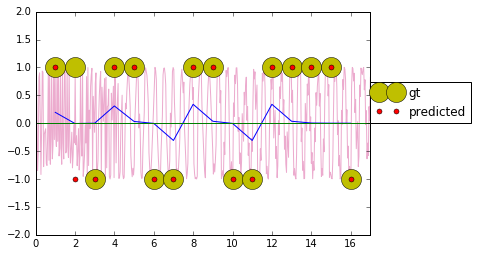

In [155]:
def get_random_labels(l):
    return (np.random.randint(2, size=(1,l)) - 0.5)*2
def fun_f(a, x):
    s = np.sin(a*x)
    t = (s>0)*1.0 # convert to 0's and 1's
    return (s, (t-0.5)*2)
def shatter_me(l=18):
    ixs_l = np.arange(1, l+1, 1).reshape(1,l)
    x = 10.**(-ixs_l)
    y = get_random_labels(l)
    a = math.pi*(1 + np.sum((1-y) * (10.**ixs_l))/2.)
    xx = np.linspace(0, l+1, 5*10**2)
    color = tuple([x/100. for x in [92.5,67.1, 80.8]])
    plt.plot(xx, np.sin(a*xx),color=color)
    s, f_vals = fun_f(a, x)
    ixs_mismatch = (f_vals != y)
    print('a: ', a)
    print('#mismatches: ', f_vals[ixs_mismatch].shape[0])
    plt.plot(ixs_l.T, s.T)
    plt.plot(ixs_l.T, y.T, 'oy', MarkerSize=20, label='gt')
    plt.plot(ixs_l.T, f_vals.T, 'or', MarkerSize=5, label='predicted')
    plt.plot((0,l+1),(0,0), 'g')
    plt.ylim(-2,2); plt.xlim(0, l+1)
    plt.legend(loc=(1, 0.5))
    plt.show()
interact(shatter_me, l=(1,50))

## minimizing the bound by minimizing h

$$
\arrthree{
f 
&=
\sqrt{
\frac
{h (\log(2N/h) + 1) - \log(\eta/4)}
{N}
}
\\ &=
\sqrt{
h^{\prime} (\log(2/h^{\prime}) + 1)
-\fracrec{N}
\log(\eta/4)
}
}
$$

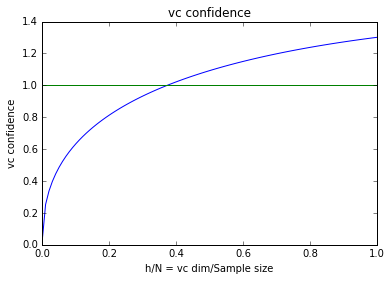

In [160]:
hp = np.linspace(1e-5,1,100)
eta, N = 0.05, 10**4
f = np.sqrt(hp * (np.log(2./hp) + 1) - math.log(eta/4)/N)
plt.plot(hp, f)
x_lims = plt.xlim()
plt.plot((x_lims[0], x_lims[1]),(1,1))
plt.title('vc confidence')
plt.ylabel('vc confidence')
plt.xlabel('h/N = vc dim/Sample size')
plt.show()

## two examples

knn, with k=1 has infinite vc dim and zero empirical risk. 

for classifiers w/ infinite vc dim, the bound is not valid.  

thus, infinite vc dim doesn't guarantee poor perf.  

# linear svm

## the seperable case

## kkt conditions

## optimal hyperplanes: an example

$$
x_{i \mu} = 
-(1 - \delta_{i \mu})
\sqrt{\frac{R}{n(n+1)}}
+ \delta_{i \mu}
\sqrt{\frac{Rn}{(n+1)}}
$$

$$
\arrthree{
\xb_i^T \xb_i &=
\displaystyle n \frac{R}{n(n+1)} + \frac{Rn}{n+1} = R
\\
\xb_i^T \xb_j &=
\displaystyle -2 \frac{R}{n+1}
+ (n-1) \frac{R}{n(n+1)} = -\frac{R}{n}
}
$$
That is
$$
\xb_i^T \xb_j = \delta_{ij} R + \Paran{1 - \delta_{ij}} \frac{R}{n}
$$

The dual formulation now becomes
$$
\L_D \equiv \sum_i^{N+1} \alpha_i - \half \sum_{i,j}^{N+1} \alpha_i \Hb_{ij} \alpha_j
- \lambda \sum_i^{N+1} \alpha_i y_i
$$

where 
$$
\Hb_{ij} = y_i y_j \xb_i^T \xb_j
$$

now
$$
\arrthree{
\displaystyle \Partial{\L_D}{\alpha_i} &= 0
\\
1 - \sum_j^{N+1} \Hb_{ij} \alpha_j - \lambda y_i &= 0
\\
\Paran{\Hb \alphab}_i + \lambda y_i &= 1
}
$$

Let
$$
\alpha_i = \Paran{\frachalf{1+y_i}}a + \Paran{\frachalf{1-y_i}}b
= \frachalf{a+b} + \frachalf{y_i}(a-b)
$$
Thus
$$
\alphab = \frachalf{a+b} \oneb + \frachalf{a-b} \mat{y_1 \\ \vdots \\ y_{N+1}}
$$

$$
\text{Remember }~~~~~~~~~~~~
\Hb_{ij} = 
\cases{
\displaystyle -y_i y_j \frac{R}{n} & \text{if } i \ne j \\
R & \text{if } i = j
}
$$

Hence
$$
\arrthree{
(\Hb \alphab)_i &=
\displaystyle~
\Paran{\frachalf{a+b}} \Brace{
R - \frac{y_i R}{n} \sum_{j \ne i}^{n+1} y_j
}
+ \Paran{\frachalf{a-b}} 
\Brace{ y_i R - n y_i \frac{R}{n}}  
\\
\displaystyle \fracrec{R} (\Hb \alphab)_i &=
\displaystyle \frachalf{a+b} \Brace{
1 + \frac{y_i}{n} y_i - \frac{y_i}{n} \sum_{j}^{n+1} y_j
}
\\
\displaystyle \frac{1 - \lambda y_i}{R}
&=
\displaystyle
\Paran{\frachalf{a+b}}
\frac{n+1}{n}
- 
\Paran{\frachalf{a+b}} \frac{y_i p}{n}
& \commentgray{$p = \sum_{j}^{n+1} y_j$}
}
$$

Comparing the constant coefficients, we get
$$
a + b = \frac{2n}{R(n+1)}
$$

Now since $\sum \alpha_i y_i = 0$ and $\alpha_i = \frachalf{a+b} + \frachalf{y_i}(a-b)$, we have
$$
\arrthree{
\sum \alpha_i y_i &= 0
\\
\ds \Paran{\frachalf{a+b}} \sum y_i + \frachalf{n+1} (a-b) &= 0
\\
a - b &= \ds -\frac{2 n p}{R (n+1)^2}
}
$$

$$
\arrthree{
a &= \ds \frac{n}{R(n+1)} \Paran{1 - \frac{p}{n+1}} \\
b &= \ds \frac{n}{R(n+1)} \Paran{1 + \frac{p}{n+1}} \\
}
$$

$$
\arrthree{
\ds \text{Hence } & \alpha_i = 
\ds \frac{n}{R(n+1)} - \frac{n p y_i}{R(n+1)^2}
= \frac{n}{R(n+1)} ~\Paran{1 - \frac{p y_i}{(n+1)}}
}
$$

Also, since $a + b = \frac{2n}{R(n+1)}$, we have
$$
\arrthree{
\displaystyle \fracrec{R} (\Hb \alphab)_i &=
\ds \frachalf{a+b} \Brace{1 + \fracrec{n} - \frac{p y_i}{n}}
= \frachalf{a+b} \Brace{\frac{n+1}{n} - \frac{p y_i}{n}}
\\ &=
\ds \frac{n}{R(n+1)} \Brace{\frac{n+1}{n} - \frac{p y_i}{n}}
\\
(\Hb \alphab)_i &=
\ds 1 - \frac{p y_i}{n+1}
}
$$

Now, 
$$
\arrthree{
\Norm{\wb}^2 &=
\ds \sum_{i=1,j=1}^{N+1} \alpha_i \alpha_j y_i y_j <\xb_i, \xb_j>
\\ &=
\alphab^T \Hb \alphab
\\ &=
\alphab^T
\mat{y_1 \xb_1^T \\ \vdots \\ y_{N+1} \xb_{N+1}^T}
\mat{y_1 \xb_1 & \cdots & y_{N+1} \xb_{N+1}}
\alphab
\\
\wt \wb &= \zt \zb & \commentgray{$\zb = \mat{y_1 \xb_1 & \cdots & y_{N+1} \xb_{N+1}} \alphab$} 
}
$$

Thus
$$
\arrthree{
\wb &=
\mat{y_1 \xb_1 & \cdots & y_{N+1} \xb_{n+1}} \alphab
\\ &=
\ds \sum_i^{N+1} y_i \alpha_i \xb_i
\\ &=
\ds \frac{n}{R(n+1)} \sum_i^{n+1} y_i ~\Paran{1 - \frac{p y_i}{(n+1)}} ~\xb_i
\\ &=
\ds \frac{n}{R(n+1)} \sum_i^{n+1} ~\Paran{y_i - \frac{p}{(n+1)}} ~\xb_i
}
$$

$$
\arrthree{
\wt \wb &=
\alphabt \Hb \alphab
\\ &=
\ds \sum_i \alpha_i (\Hb \alphab)_i 
\\ &=
\ds \sum_i \alpha_i \Paran{1 - \frac{p y_i}{n+1}}
\\ &=
\ds \sum_i \alpha_i  - \frac{p}{n+1} \underbrace{\sum_i \alpha_i y_i}_{\text{0}}
\\ &=
\ds \sum_i \frac{n}{R(n+1)} ~\Paran{1 - \frac{p y_i}{(n+1)}}
\\ &=
\ds \frac{n}{R(n+1)} ~(n+1) - \frac{n p}{R(n+1)^2} \sum_i y_i 
\\
\wt \wb = \Norm{\wb}^2 &= 
\ds \frac{n}{R} ~\Paran{1 - \frac{p^2}{(n+1)^2}}
}
$$

Now, the maximum margin **M** is given as
$$
\arrthree{
\Mb &=
\ds \frac{2}{\Norm{\wb}}
\\ &=
\ds \frac
{2 R}
{\sqrt{ n \Paran{1 - \ds \frac{p^2}{(n+1)^2}}}}
}
$$

**Min Margin**

* when (n+1) is even
  * there would be equal #positives & #negatives
  * Hence p=0
  * $\ds \Mb_{\text{min}} = \frac{2R}{\sqrt{n}}$
* when (n+1) is odd
  * $p = \pm 1$
  * $\ds \Mb_{\text{min}} = \frac{2R (n+1)}{\sqrt{n (n^2 + 2n)}} = \frac{2R (n+1)}{n \sqrt{n+2}}$
$$
$$

# Methods of solution

list of available solvers  => (More and Wright, 1993).

$$
\arrthree{
}
$$

$$
\arrthree{
}
$$

$$
\arrthree{
}
$$

$$
\arrthree{
}
$$

$$
\arrthree{
}
$$

$$
\arrthree{
}
$$

$$
\arrthree{
}
$$

$$
\arrthree{
}
$$